In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Web Scraping

In [2]:
url = "https://www.gadgets360.com/finance/bitcoin-price-history"

In [3]:
req = requests.get(url)

In [4]:
req

<Response [200]>

In [5]:
content = BeautifulSoup(req.text,'lxml')

In [6]:
content

<!DOCTYPE html>
<html lang="en">
<head>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="en" http-equiv="content-language"/>
<meta content="width=1280" name="viewport"/>
<meta content="Gadgets" property="category"/>
<meta content="gadgets" property="taboola-category"/>
<title>Bitcoin Price History | BTC INR Historical Data, Chart &amp; News (13th June 2023) - Gadgets 360</title>
<meta content="Bitcoin Price History: Find Bitcoin Historical Price With Daily High, Low, Trading Volume" name="description"/>
<meta content="bitcoin price history, btc price history, bitcoin historical price, bitcoin historical data, btc historical data." name="keywords"/>
<meta content="bitcoin price history, btc price history, bitcoin historical price, bitcoin historical data, btc historical data." name="news_keywords"/>
<link href="https://www.gadgets360.com/finance/bitcoin-price-history" rel="canonical"/>
<meta conten

In [7]:
bit = content.find_all('tr',{'class':'_cptbltr'})

In [8]:
bit

[<tr class="_cptbltr">
 <th class="_cphdc">Date</th>
 <th class="_lft">Open</th>
 <th class="_lft">High</th>
 <th class="_lft">Low</th>
 <th class="_lft">Close</th>
 <th class="_lft">Volume</th>
 <th class="_chngt">Change (%)</th>
 </tr>,
 <tr class="_cptbltr">
 <td class="_cphdc">
 <div class="_flx">
 <div class="_flx _cpnm">12-Jun-2023</div>
 </div>
 </td>
 <td class="_lft">
                                 ₹ 21,41,795                            </td>
 <td class="_lft">
                                 ₹ 21,41,795                            </td>
 <td class="_lft">
                                 ₹ 21,28,009                            </td>
 <td class="_lft">
                                 ₹ 21,28,009                            </td>
 <td class="_lft">                                     ₹ 1.0T                                                            </td>
 <td class="_chngt">
 <span class="_rtxt">-0.64%</span>
 </td>
 </tr>,
 <tr class="_cptbltr">
 <td class="_cphdc">
 <div cla

In [9]:
dt=[]
op=[]
hg=[]
lo=[]
cl=[]
vl=[]
ch=[]

In [10]:
for item in bit[1:60]:
    date=item.find('div',{'class':'_flx _cpnm'})
    dt.append(date.text)
    
    open = item.find('td',{'class':'_lft'})
    op.append(open.text.strip())
    
    high = item.find_all('td',{'class':'_lft'})[1].text
    hg.append(high.strip())
    
    low = item.find_all('td',{'class':'_lft'})[2].text
    lo.append(low.strip())
    
    close = item.find_all('td',{'class':'_lft'})[3].text
    cl.append(close.strip())
    
    volume=item.find_all('td',{'class':'_lft'})[4].text
    vl.append(volume.strip())
    
    change = item.find('td',{'class':'_chngt'}).text
    ch.append(change.strip())
    
    

In [11]:
len(dt)

59

In [12]:
len(op)

59

In [13]:
len(hg)

59

In [14]:
len(lo)

59

In [15]:
len(cl)

59

In [16]:
len(ch)

59

# Data Cleaning

In [17]:
# create a DataFrame using pandas
data={'Date':dt,'Open':op,'High':hg,'Low':lo,'Close':cl,'Volume':vl,'Change':ch}
df=pd.DataFrame(data)

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,12-Jun-2023,"₹ 21,41,795","₹ 21,41,795","₹ 21,28,009","₹ 21,28,009",₹ 1.0T,-0.64%
1,11-Jun-2023,"₹ 21,26,737","₹ 21,33,181","₹ 21,24,230","₹ 21,33,181",₹ 1.0T,+0.30%
2,10-Jun-2023,"₹ 21,82,257","₹ 21,82,257","₹ 21,39,278","₹ 21,39,278",₹ 915.4B,-1.97%
3,09-Jun-2023,"₹ 21,97,615","₹ 22,00,495","₹ 21,92,209","₹ 21,92,209",₹ 977.7B,-0.25%
4,08-Jun-2023,"₹ 21,79,484","₹ 22,05,572","₹ 21,75,665","₹ 22,05,572",₹ 1.1T,+1.20%


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    59 non-null     object
 1   Open    59 non-null     object
 2   High    59 non-null     object
 3   Low     59 non-null     object
 4   Close   59 non-null     object
 5   Volume  59 non-null     object
 6   Change  59 non-null     object
dtypes: object(7)
memory usage: 3.4+ KB


In [20]:
df.dtypes

Date      object
Open      object
High      object
Low       object
Close     object
Volume    object
Change    object
dtype: object

In [21]:
df.shape

(59, 7)

In [22]:
# Remove ['₹','%','T','B']
df=df.replace('[₹%TB,]','',regex=True)

In [23]:
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,12-Jun-2023,2141795,2141795,2128009,2128009,1.0,-0.64
1,11-Jun-2023,2126737,2133181,2124230,2133181,1.0,+0.30
2,10-Jun-2023,2182257,2182257,2139278,2139278,915.4,-1.97
3,09-Jun-2023,2197615,2200495,2192209,2192209,977.7,-0.25
4,08-Jun-2023,2179484,2205572,2175665,2205572,1.1,+1.20


In [24]:
df.dtypes

Date      object
Open      object
High      object
Low       object
Close     object
Volume    object
Change    object
dtype: object

In [25]:
# Convert object dtype into float dtype
df[['Open','High','Low','Close','Volume','Change']] = df[['Open','High','Low','Close','Volume','Change']].astype(float)

In [26]:
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,12-Jun-2023,2141795.0,2141795.0,2128009.0,2128009.0,1.0,-0.64
1,11-Jun-2023,2126737.0,2133181.0,2124230.0,2133181.0,1.0,0.30
2,10-Jun-2023,2182257.0,2182257.0,2139278.0,2139278.0,915.4,-1.97
3,09-Jun-2023,2197615.0,2200495.0,2192209.0,2192209.0,977.7,-0.25
4,08-Jun-2023,2179484.0,2205572.0,2175665.0,2205572.0,1.1,1.20


In [27]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
Change    float64
dtype: object

In [28]:
df.describe()

,Open,High,Low,Close,Volume,Change
count,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01,59.000000,59.000000
mean,2.246040e+06,2.299224e+06,2.186729e+06,2.240465e+06,216.920339,-1.841017
std,3.135015e+05,1.029037e+05,4.225397e+05,3.115346e+05,375.466265,13.110478
min,0.000000e+00,2.130024e+06,0.000000e+00,0.000000e+00,1.000000,-100.000000
25%,2.209996e+06,2.225946e+06,2.202800e+06,2.210414e+06,1.200000,-0.980000
50%,2.252180e+06,2.261371e+06,2.236012e+06,2.250612e+06,1.400000,0.000000
75%,2.356606e+06,2.389178e+06,2.313640e+06,2.347250e+06,352.900000,0.335000
max,2.491847e+06,2.511392e+06,2.483516e+06,2.483516e+06,977.700000,7.350000


In [29]:
# missing values in this data
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

In [30]:
# duplicated values
df.duplicated().sum()

0

In [31]:
# columns name
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

# EDA (Exploratary Data Analysis)

In [32]:
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,12-Jun-2023,2141795.0,2141795.0,2128009.0,2128009.0,1.0,-0.64
1,11-Jun-2023,2126737.0,2133181.0,2124230.0,2133181.0,1.0,0.30
2,10-Jun-2023,2182257.0,2182257.0,2139278.0,2139278.0,915.4,-1.97
3,09-Jun-2023,2197615.0,2200495.0,2192209.0,2192209.0,977.7,-0.25
4,08-Jun-2023,2179484.0,2205572.0,2175665.0,2205572.0,1.1,1.20


In [33]:
# Time Series Analysis
df['Date'] = pd.to_datetime(df.Date)

In [34]:
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,2023-06-12,2141795.0,2141795.0,2128009.0,2128009.0,1.0,-0.64
1,2023-06-11,2126737.0,2133181.0,2124230.0,2133181.0,1.0,0.30
2,2023-06-10,2182257.0,2182257.0,2139278.0,2139278.0,915.4,-1.97
3,2023-06-09,2197615.0,2200495.0,2192209.0,2192209.0,977.7,-0.25
4,2023-06-08,2179484.0,2205572.0,2175665.0,2205572.0,1.1,1.20


In [35]:
df.loc[df.Open.idxmax()] # highest open price record

Date      2023-04-15 00:00:00
Open                2491847.0
High                2493268.0
Low                 2483516.0
Close               2483516.0
Volume                    1.1
Change                  -0.33
Name: 57, dtype: object

In [36]:
df.loc[df.Open.idxmin()] # lowest open price record

Date      2023-05-09 00:00:00
Open                      0.0
High                2274352.0
Low                       0.0
Close               2260591.0
Volume                    1.3
Change                    0.0
Name: 33, dtype: object

In [37]:
df.loc[df.Change.idxmax()] # highest change price record

Date      2023-04-26 00:00:00
Open                2264443.0
High                2435906.0
Low                 2264443.0
Close               2430940.0
Volume                    2.2
Change                   7.35
Name: 46, dtype: object

In [38]:
df.loc[df.Change.idxmin()] # lowest change price record

Date      2023-05-08 00:00:00
Open                2366850.0
High                2366850.0
Low                       0.0
Close                     0.0
Volume                    1.4
Change                 -100.0
Name: 34, dtype: object

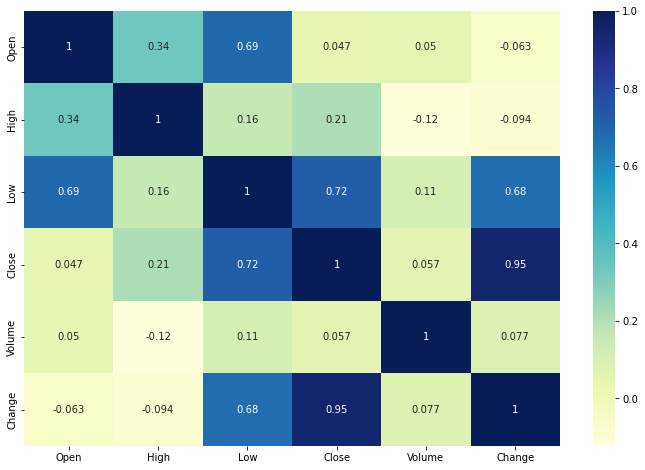

In [39]:
# let's Visualize our counts
# let's check the correlation between our features
plt.figure(figsize=(12,8))
sb.heatmap(df.corr(),annot=True,cmap='YlGnBu',)
plt.show()

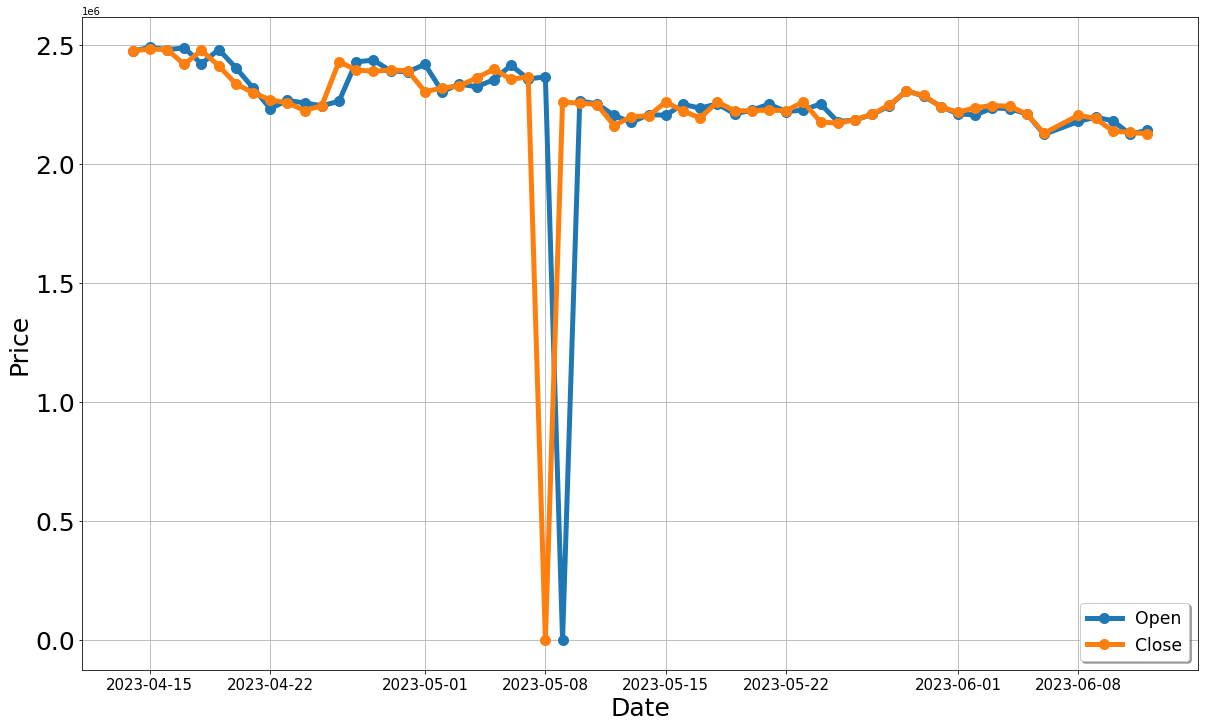

In [40]:
# let's Visualize our counts
plt.figure(figsize=(20,12))
plt.xlabel('Date',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.tick_params(axis='y',labelsize=25)
plt.tick_params(axis='x',labelsize=15)
plt.plot(df.Date,df.Open,label='Open',linewidth = 5,marker='.',markersize=20)
plt.plot(df.Date,df.Close,label='Close',linewidth = 5,marker='.',markersize=20)
plt.legend(loc='lower right',fontsize='xx-large',shadow=True)
plt.grid()

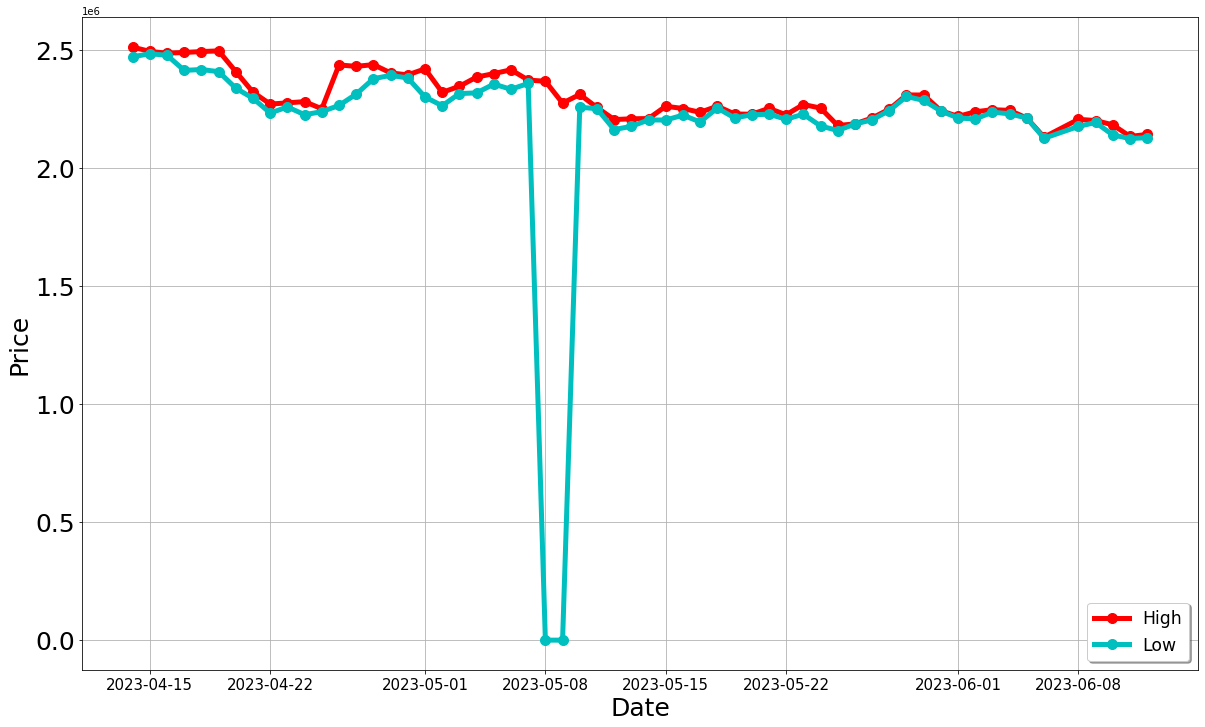

In [41]:
plt.figure(figsize=(20,12))
plt.xlabel('Date',fontsize=25)
plt.ylabel('Price',fontsize=25)
plt.tick_params(axis='y',labelsize=25)
plt.tick_params(axis='x',labelsize=15)
plt.plot(df.Date,df.High,label='High',linewidth = 5,marker='.',markersize=20,color='r')
plt.plot(df.Date,df.Low,label='Low',linewidth = 5,marker='.',markersize=20,color='c')
plt.legend(loc='lower right',fontsize='xx-large',shadow=True)
plt.grid()

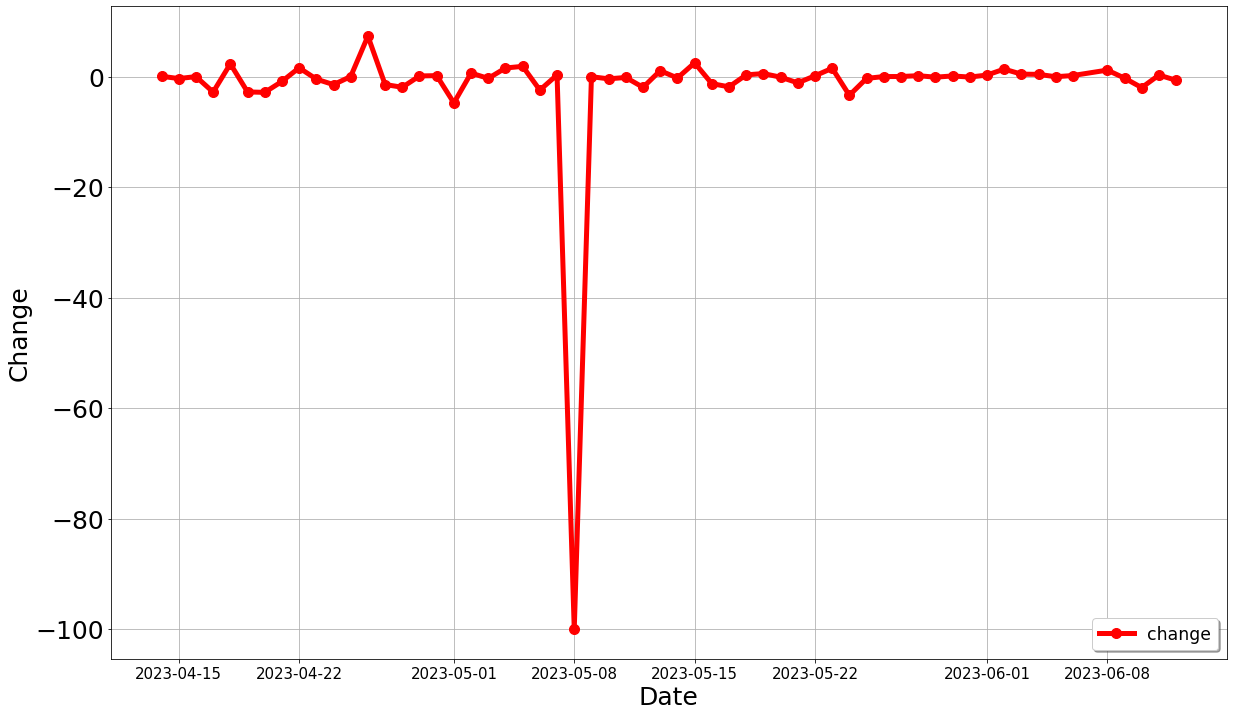

In [42]:
plt.figure(figsize=(20,12))
plt.xlabel('Date',fontsize=25)
plt.ylabel('Change',fontsize=25)
plt.tick_params(axis='y',labelsize=25)
plt.tick_params(axis='x',labelsize=15)
plt.plot(df.Date,df.Change,label='change',linewidth = 5,marker='.',markersize=20,color='r')
plt.legend(loc='lower right',fontsize='xx-large',shadow=True)
plt.grid()

# Data Preprocessing

In [43]:
df.head()

,Date,Open,High,Low,Close,Volume,Change
0,2023-06-12,2141795.0,2141795.0,2128009.0,2128009.0,1.0,-0.64
1,2023-06-11,2126737.0,2133181.0,2124230.0,2133181.0,1.0,0.30
2,2023-06-10,2182257.0,2182257.0,2139278.0,2139278.0,915.4,-1.97
3,2023-06-09,2197615.0,2200495.0,2192209.0,2192209.0,977.7,-0.25
4,2023-06-08,2179484.0,2205572.0,2175665.0,2205572.0,1.1,1.20


In [44]:
# Preprocess the data
# Get the features & Target from the Data
X = df[['Open','High','Low','Volume','Change']]
X.head()

,Open,High,Low,Volume,Change
0,2141795.0,2141795.0,2128009.0,1.0,-0.64
1,2126737.0,2133181.0,2124230.0,1.0,0.30
2,2182257.0,2182257.0,2139278.0,915.4,-1.97
3,2197615.0,2200495.0,2192209.0,977.7,-0.25
4,2179484.0,2205572.0,2175665.0,1.1,1.20


In [45]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [46]:
X # feature (inputs)

array([[-3.35373502e-01, -1.54299802e+00, -1.40163054e-01,
        -5.80008876e-01,  9.23937525e-02],
       [-3.83817475e-01, -1.62742594e+00, -1.49183362e-01,
        -5.80008876e-01,  1.64707576e-01],
       [-2.05200837e-01, -1.14642009e+00, -1.13264442e-01,
         1.87626791e+00, -9.92261441e-03],
       [-1.55791717e-01, -9.67665008e-01,  1.30795504e-02,
         2.04361923e+00,  1.22396296e-01],
       [-2.14122017e-01, -9.17904093e-01, -2.64102571e-02,
        -5.79740255e-01,  2.33944215e-01],
       [-3.88524178e-01, -1.65836846e+00, -1.46691380e-01,
        -5.78128524e-01,  1.58553208e-01],
       [-1.12997075e-01, -8.65516445e-01,  5.77347317e-02,
         1.98237348e+00,  1.41628696e-01],
       [-3.99900977e-02, -5.45809673e-01,  1.00726204e-01,
         1.35917115e+00,  1.74708424e-01],
       [-3.22624830e-02, -5.16896003e-01,  1.17635404e-01,
         1.44271249e+00,  1.77785608e-01],
       [-1.25457130e-01, -6.04656341e-01,  4.84900493e-02,
        -5.79471633e-01

In [48]:
y = df['Close']

In [50]:
# Convert the continuous target variable to discrete class labels
encoder = LabelEncoder()

In [51]:
encoder.fit_transform(y)

array([ 1,  3,  4,  9, 13,  2, 15, 25, 27, 23, 16, 24, 37, 40, 28, 14,  8,
        6,  7, 35, 19, 22, 20, 18, 34, 10, 17, 33, 12, 11,  5, 29, 30, 32,
        0, 46, 44, 51, 45, 42, 41, 39, 48, 49, 47, 50, 54, 26, 21, 31, 36,
       38, 43, 52, 56, 53, 57, 58, 55], dtype=int64)

In [52]:
# split the training 80% and testing 20% data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [53]:
X_train.shape

(47, 5)

In [54]:
X_test.shape

(12, 5)

In [55]:
y_train.shape

(47,)

In [56]:
y_test.shape

(12,)

# Model Training

In [57]:
# apply algo LinearRegression
model=LinearRegression()

In [58]:
model.fit(X_train,y_train)

LinearRegression()

# Predict the Model

In [59]:
# predictions on the test set
y_pred=model.predict(X_test)
y_pred

array([2245091.98670618, 2194907.6760745 , 2394382.62637304,
       2287857.19881297, 2223964.85966057, 2160519.80907943,
       2530529.83703267, 2137244.40741376, 2229134.39556556,
       2214965.27471601, 2373631.37928205, 2323612.58993917])

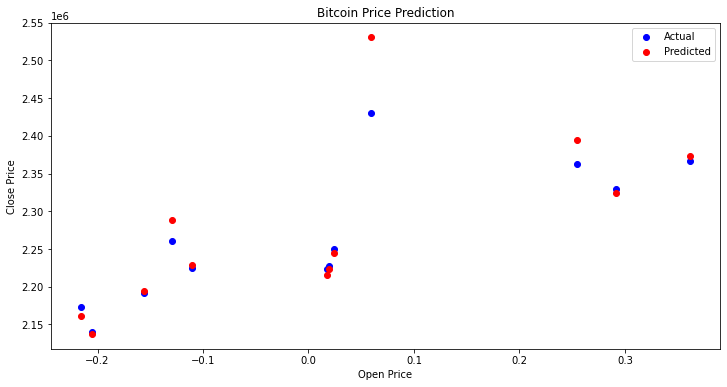

In [75]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()

In [70]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1005053583.4559656


In [71]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 31702.580075696766


In [72]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 17577.348802138895


In [76]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2) Score:", r2* 100)

R-squared (R^2) Score: 85.9907804266265
